In [168]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [170]:
data=pd.read_csv('uber.csv')

In [171]:
data.info

<bound method DataFrame.info of         Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC    

In [172]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [173]:
data=data.drop(['Unnamed: 0'], axis=1)

In [174]:
data=data.drop(['key'], axis=1)

In [175]:
data.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [186]:
data=data.drop(['pickup_datetime'], axis=1)

In [187]:
data['dropoff_longitude']=data['dropoff_longitude'].fillna(data['dropoff_longitude'].mean())

In [188]:
data['dropoff_latitude']=data['dropoff_latitude'].fillna(data['dropoff_latitude'].mean())

In [189]:
data.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

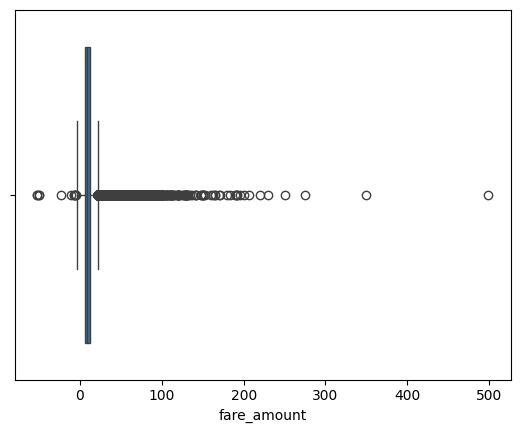

In [190]:
sns.boxplot(x=data['fare_amount'])
plt.show()

In [153]:
def remove_all_outliers(df1, col):
    Q1=df1[col].quantile(0.25)
    Q3=df1[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    data[col]=np.clip(df1[col], lower_bound, upper_bound)
    return df1
def treat_outliers(df1,cols_list):
    for c in cols_list:
        df=remove_all_outliers(df1,c)
    return df

In [156]:
cols = ['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance']
data=treat_outliers(data, cols)

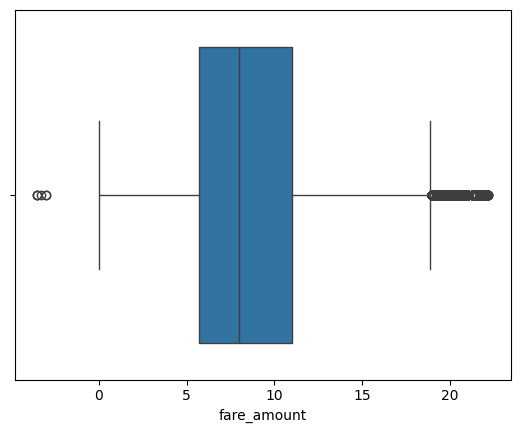

In [191]:
Q1 = data["fare_amount"].quantile(0.25)
Q3 = data["fare_amount"].quantile(0.75)
IQR = Q3 - Q1
# Define a threshold (e.g., 1.5 times the IQR) to identify outliers
threshold = 1.5
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
# Remove outliers
data_no_outliers = data[(data["fare_amount"] >= lower_bound) &
(data["fare_amount"] <= upper_bound)]
# Visualize the 'fare_amount' distribution without outliers
sns.boxplot(x=data_no_outliers["fare_amount"])
plt.show()

In [192]:
crr_matrix=data.corr()

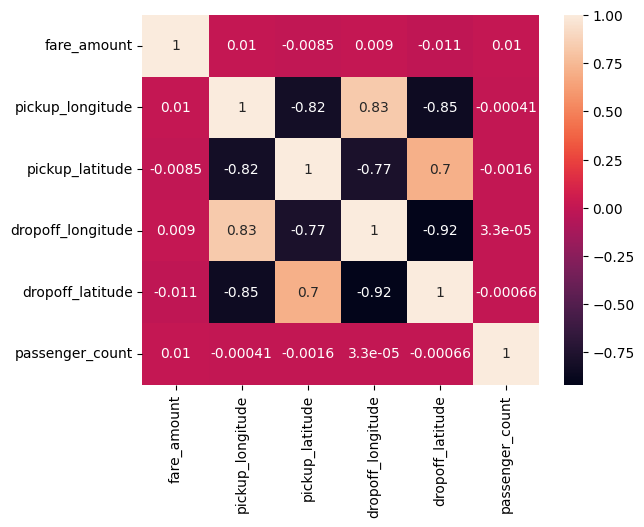

In [194]:
sns.heatmap(crr_matrix, annot=True)
plt.show()

In [200]:
X= data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
Y=data['fare_amount']

In [206]:
x_train, x_test, y_train, y_test=train_test_split(X, Y, train_size=0.2, random_state=42)

In [207]:
lr_model=LinearRegression()

In [209]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [214]:
lr_y_pred=lr_model.predict(x_test)
lr_y_pred

array([11.27334545, 11.98019483, 11.48689014, ..., 11.27255863,
       11.27227279, 11.27226803])

In [219]:
rf_model=RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [221]:
rf_y_pred=rf_model.predict(x_train)

In [223]:
from sklearn.metrics import r2_score, mean_squared_error
r2=r2_score(y_test,lr_y_pred)
r2

0.0002017128214149011